In [3]:
print("Hello World")

import os
print(os.getcwd())

Hello World
/content


# 2장

# 설정

파이썬 버전을 확정하고 관련된 패키지를 임포트한다.

In [20]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 그림을 그리기 위해 새로운 함수 생성
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 가져오기

파일 만들기

https://raw.githubusercontent.com/rickiepark/handson-ml2/master/ 에 있는 정보를 파일에 저장

In [4]:
import os
import tarfile #리눅스의 파일집 압축해제해서 가져오기 위해
import urllib.request

#주소를 입력받음
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
#파이썬에서 알아서 주소 세팅
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#서버(housing_url)에서 가져와서 함수(housing_path)에 저장
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # 인터넷주소에서 다운받음
    urllib.request.urlretrieve(housing_url, tgz_path)
    #파일 오픈 -> 새로운 객체에 저장 ,tgz_path에서 사용하는 내용을  housing_tgz에 저장
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path) #실제 데이터를 저장
    housing_tgz.close() 

파일 저장 소스 실행

In [7]:
fetch_housing_data()

객체 형태로 바꿈

In [8]:
#pandas를 사용해서 엑셀 파일에 있는 데이터를 파이썬이 읽을 수 있는 형태로 바꿈
#as pd => pandas 모듈을 pd로 지정pandas를 사용해서 엑셀 파일에 있는 데이터를 파이썬이 읽을 수 있는 형태로 바꿈
#as pd = pandas 모듈을 pd로 지정
import pandas as pd

#housing.csv 파일을 접근한다
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
        return pd.read_csv(csv_path)

        #데이터 프레임 객체를 반환
import pandas as pd

#housing.csv 파일을 접근한다
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#데이터 프레임 객체를 반환

In [10]:
#데이터의 형태(특성)를 확인하는 코드
housing = load_housing_data()
#확인(조회)하는 헤드
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
#또다른 형태로 확인할 수 있는 코드
housing.info()

#dtypes = 데이터 타입
#object = 객체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
#'ocean_proximity'에 해당하는 데이터만 확인하겠다!
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
#숫자형 특성의 용약 정보
#ocean_proximity는 객체이므로 학인X
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


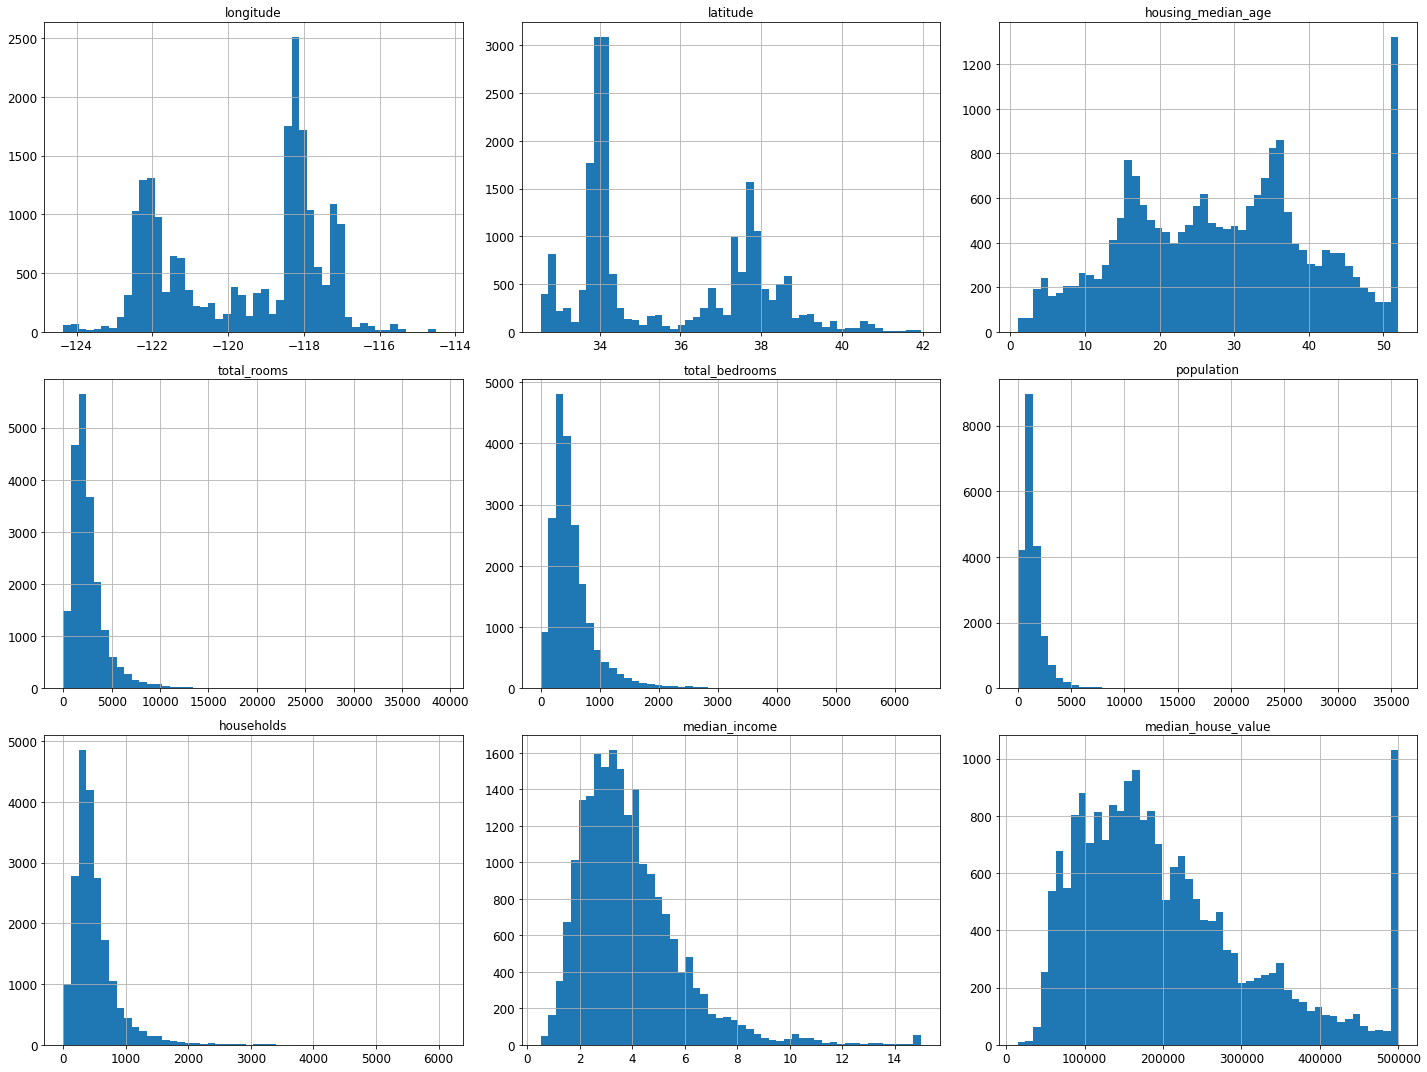

In [22]:
#주피터 노트북의 매직 명령 -> 노트북에서 그림으로 나타내기 위해서
#주피터 노트북에서만 사용하는 문법

%matplotlib inline 
import matplotlib.pyplot as plt
#50칸으로 나누고
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show() # 화면에 뿌리기

In [24]:
#노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [25]:
import numpy as np

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
# test_ratio = 테스트 비율 = 데이터셋의 20% wjdeh
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    #테스트셋의 개수(데이터 개수*test_ratio)
    test_set_size = int(len(data) * test_ratio)
    #0부터 test_set_size까지 이덱스 배열을 짤라서 리스트업
    test_indices = shuffled_indices[:test_set_size]
    #test_set_size 부터 끝까지 인덱스 배열을 짤라서 리스트업
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [26]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [27]:
len(test_set)

4128

In [28]:
#20%이하 데이터
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [30]:
#20%초과하는 데이터
train_set.head

<bound method NDFrame.head of        longitude  latitude  ...  median_house_value  ocean_proximity
14196    -117.03     32.71  ...            103000.0       NEAR OCEAN
8267     -118.16     33.77  ...            382100.0       NEAR OCEAN
17445    -120.48     34.66  ...            172600.0       NEAR OCEAN
14265    -117.11     32.69  ...             93400.0       NEAR OCEAN
2271     -119.80     36.78  ...             96500.0           INLAND
...          ...       ...  ...                 ...              ...
11284    -117.96     33.78  ...            229200.0        <1H OCEAN
11964    -117.43     34.02  ...             97800.0           INLAND
5390     -118.38     34.03  ...            222100.0        <1H OCEAN
860      -121.96     37.58  ...            283500.0        <1H OCEAN
15795    -122.42     37.77  ...            325000.0         NEAR BAY

[16512 rows x 10 columns]>

In [ ]:
#[25]함수를 간단하게 sklearn을 이용해서 구현
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 데이터 이해를 위한 탐색과 시각화

In [31]:
housing = train_set.copy()
#copy를 안하면 housing에 변화를 주면 train_set도 변함
#파이썬은 주소를 가지고 있어서 같다라고 하면 주소까지 같아진다.
#그럼 하나가 변하면 다른 하나도 변함
#housing이라는 객체를 새로 만듦

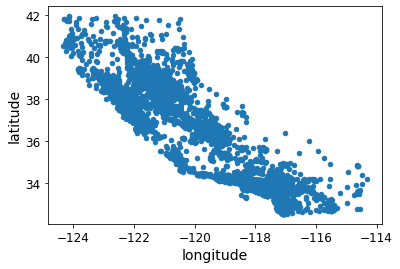

In [32]:
#그림 객체 반환그림 객체 반환
housing.plot(kind='scatter', x="longitude", y="latitude")
housing.plot(kind='scatter', x="longitude", y="latitude")

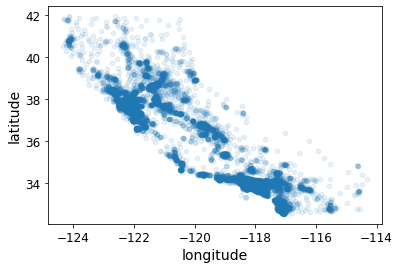

In [34]:
#alpha = 밀집한 부분이 잘 보일수 있도록 투명도 설정alpha = 밀집한 부분이 잘 보일수 있도록 투명도 설정
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

그림 저장: housing_prices_scatterplot


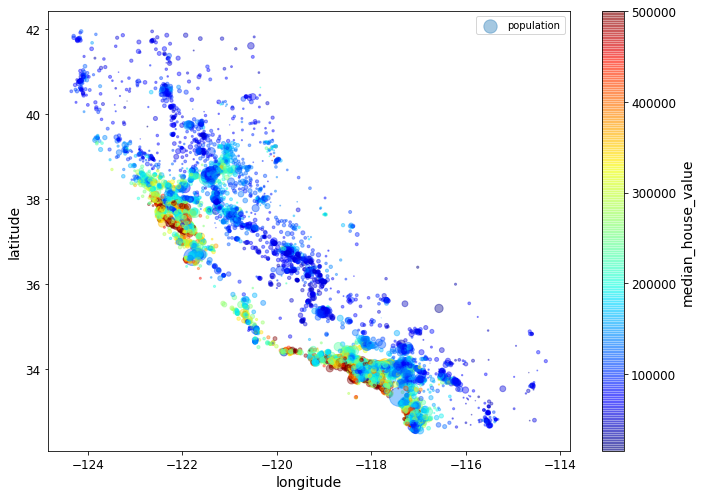

In [33]:
#색 표시
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

그림 저장: scatter_matrix_plot


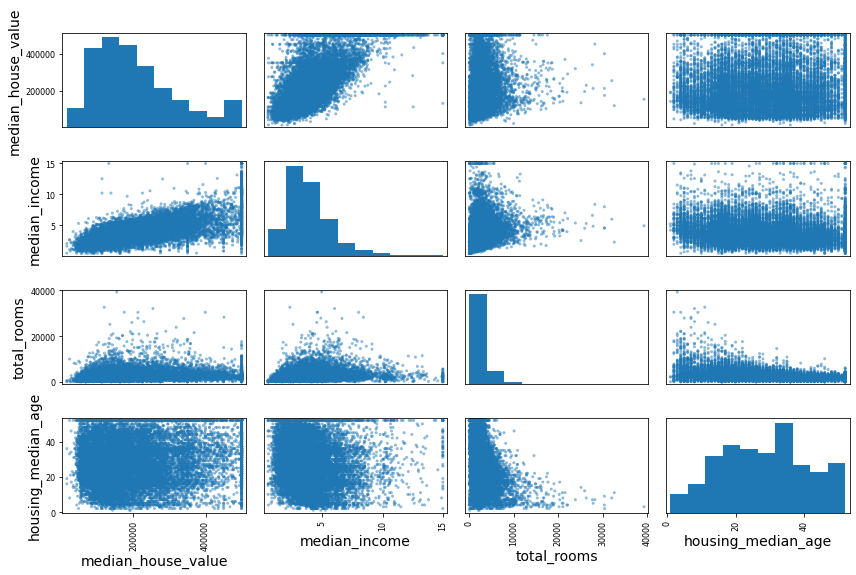

In [35]:
#상관관계 표시
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


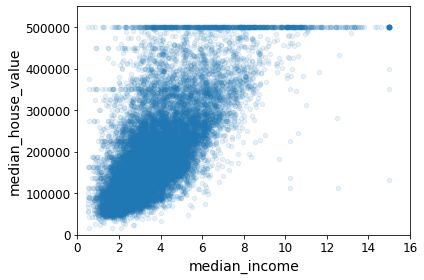

In [36]:
#중간 소득 대 중간 주택 가격 비교 & 투명도 차이로 구별
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
#구간 간격 조정
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")